# Fishing Exploratory Data Analysis

# Author
Giovanni Jericho Mantuhac

# Abstract

Commercial fishing has been a prevelant source of income and vitality for many people. Due to an expanded increase in innovation in the fishing industry, many countries find that the amount of catches has increased throughout each year. However, certain species may not follow a similar trend compared to the growth of the industry and can quickly gain popularity and rapidly lose popularity in the process. Generally speaking, what species have been consistently ranked in the top most fished over multiple years? and vice versa

In this report, we use a dataset from [Kaggle.com](https://www.kaggle.com/datasets/thebumpkin/worldwide-fishing-catch-statitstics-1950-2018) to answer this question. Through cleaning, melting, and visualizing the dataset through boxplots, I was presented with more added questions rather than answers to my already set questions. Tuna, instead of carp, seemed to be prevelent in the top and bottom ranked species adding to the ambiguity of the dataset itself.

In the conclusion, there is a need to motivate the report to more closely analyze the geographic locations of the catches as well and the timeline the catch occured in. Since my model did not expect for a similar species to appear both in the Top 5 and Bottom 5, it would help to visualize and explain other features related to why such an occurance is in the data.

# Research Questions
- **For each country, what oceanic species are consistently ranked among the top (e.g., top 5) most fished over multiple years?**
    - ~What was the fastest rate of change the fish experienced in a certain country~
    - ~What was the slowest rate of change the fish experienced in a certain country~
- **For each country, what oceanic species are consistently ranked among the least fished (non-zero total) over multiple years?**
    - ~What was the fastest rate of change the fish experienced in a certain country~
    - ~What was the slowest rate of change the fish experienced in a certain country~

# Background and Prior Work

When touring coastlines, we may encounter groups of fishermen looking to fish for the sake of consumption, or for the sake of sport. In focusing on those who fish for consumption, many tend to fish on a re-occuring basis, especially when a plentiful amount of species are in season. In addition, other fishermen cultivate large amounts of species for consumption or for the sale of consumption. I am curious to descover the full weighted extent for the amount of species fished every year. Specifically, for certain countries, in each year, I am curious to find out what species are consistently ranked at the top, and bottom, when fished collectively every year.

In the article, "San Diego Bay Fish Consumption Study", the authors Steven J. Steinberg and Shelly Moore set out to measure the certain demographics of those who fish in the San Diego bay, whether it may be the bay, shore, or pier. In addition, the authors set out to mesure whats kinds of fish anglers are catching the most. The results of the article were measured using a bar chart and, in pertaining to what is relevant to this EDA, species such as the Spotted Sand Bass and the Pacific Chub Mackerel are fished the most, percentage wise, when measured accross all anglers. I am using similar analysis charts used in the article; however, I am not measuring based on the percent of fish per angler but more-so measuring the amount of species fished collectively in a country per year.


1. Steinberg, Steven J, and Shelly L Moore. “San Diego Bay Fish Consumption Study - Ftp Directory Listing.” San Diego Bay Fish Consumption Study, Mar. 2017, [ftp.sccwrp.org/pub/download/DOCUMENTS/TechnicalReports/976_SanDiegoFishConsumptionStudy.pdf](ftp.sccwrp.org/pub/download/DOCUMENTS/TechnicalReports/976_SanDiegoFishConsumptionStudy.pdf).

# Hypothesis

Using this [Wikipedia.com article](https://en.wikipedia.org/wiki/List_of_commercially_important_fish_species), my hypothesis is that a carp species will at least be in the top 5 most fished species. Species like the Grass, Silver, and Common Carp are often cultivated which means that they can commercially be sold in mass quantities. Scrolling to the bottom of the table labeled as "Harvested aquatic animals by weight," there are species such as Goldstripe Sardinella, Pacific Sandlance, Blue Swimmingcrab, Antarctic Krill, etc. It is a bit hard to make a specific hypothesis for the least fished species over multiple years, but I hypothesize to see very specific kinds of species, less general than the carp, and at lead one of the species I mentioned earlier.

# Data
## Data Overview

- Dataset Name: Worldwide Fishing Catch Statistics 1950-2018
- Dataset Link: [FishStats2018.csv](https://www.kaggle.com/datasets/thebumpkin/worldwide-fishing-catch-statitstics-1950-2018)
- Number of Observations: 25562
- Number of Variables: 72

# Worldwide Fishing Catch Statistics 1950-2018: Column Descriptions

## `Country`
- **Description:** The country where the fish was caught.
- **Type:** String
- **Relevance:** A proxy for fish association and complexity. Certain fishes may or may not be caught in certain countries.

## `Species`
- **Description:** The type of fish that was caught.
- **Type:** String
- **Relevance:** The category of the fish. More occurances of the fish in multiple regions/countries may indicate larger catches.

## `Location`
- **Description:** The general geographic location (water-based) where the fish was caught.
- **Type:** String
- **Relevance:** A proxy for fish association and complexity. Certain fishes may or may not be caught in certain areas of the world.

## `1950` ... `2018`
- **Description:** The total weight of the fish caught during that specific year (in tons).
- **Type:** Integer
- **Relevance:** The total amount of tons can indicate high or low fish capture.

*Note: The `Detail` column (indicating capture method, aquaculture or capture, of the fish) is not included as I do not plan to use the column to answer the research questions. However, it still may be relevant.*

# Data Cleaning Steps
1. **Validate Data Types:** Ensure that `Country`, `Species`, and `Location` are all strings. Also ensure that the columns `1950` to `2018` are all integers.
2. **Check for Missing Values:** Identify and handle missing values.
3. **Duplicate Entries:** Search and remove dupicate rows.
4. **Anomalous Ratings:** Check whether the amount of tons for each fish caught are realistic, handle appropriately. *(i.e. if a country catches 1 hundred million tons of fish, that is unrealistic)*

In [2]:
import numpy as np
import pandas as pd

# Cleaning the Dataset

**Is the dataset clean?** 

The dataset seems generally clean. It seems like there are 162 missing values in the `Species` column and 200 missing values in the `Country` column. Besides that, every other column does not have any missing values.

**Are the columns of the right data type?**

Yes, it seems like all the columns are the data type of what we expected, strings and integers.

**How did I make the dataset into a usable format?**

I will drop the rows which had a missing value in the `Species` and `Country` column.

In [3]:
fishing = pd.read_csv("Downloads/Projects/Ocean EDA and Machine Learning/FishStats2018.csv")

In [4]:
fishing.head()

,Country,Species,Location,Detail,1950,1951,1952,1953,1954,1955,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,Cyprinids nei,Asia - Inland waters,Aquaculture production (freshwater),0,0,0,0,0,0,...,1500,2100,2800,3430,4060,4710,5400,6100,6950,7900
1,Afghanistan,Freshwater fishes nei,Asia - Inland waters,Capture production,100,100,100,100,100,200,...,1000,1000,1150,1300,1450,1600,1750,1900,2000,2050
2,Afghanistan,Rainbow trout,Asia - Inland waters,Aquaculture production (freshwater),0,0,0,0,0,0,...,150,150,50,50,50,50,50,50,50,50
3,Albania,"Angelsharks, sand devils nei",Mediterranean and Black Sea,Capture production,0,0,0,0,0,0,...,14,78,12,5,5,4,4,3,0,0
4,Albania,Atlantic bluefin tuna,Mediterranean and Black Sea,Capture production,0,0,0,0,0,0,...,50,0,0,0,9,34,40,47,57,100


In [5]:
fishing.isna().sum()

Country     200
Species     162
Location      0
Detail        0
1950          0
           ... 
2014          0
2015          0
2016          0
2017          0
2018          0
Length: 73, dtype: int64

In [6]:
# Want to check the amount of observations the dataset has
len(fishing)

25562

In [7]:
# Need to make sure that every column is encoded correctly
fishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25562 entries, 0 to 25561
Data columns (total 73 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   25362 non-null  object
 1   Species   25400 non-null  object
 2   Location  25562 non-null  object
 3   Detail    25562 non-null  object
 4   1950      25562 non-null  int64 
 5   1951      25562 non-null  int64 
 6   1952      25562 non-null  int64 
 7   1953      25562 non-null  int64 
 8   1954      25562 non-null  int64 
 9   1955      25562 non-null  int64 
 10  1956      25562 non-null  int64 
 11  1957      25562 non-null  int64 
 12  1958      25562 non-null  int64 
 13  1959      25562 non-null  int64 
 14  1960      25562 non-null  int64 
 15  1961      25562 non-null  int64 
 16  1962      25562 non-null  int64 
 17  1963      25562 non-null  int64 
 18  1964      25562 non-null  int64 
 19  1965      25562 non-null  int64 
 20  1966      25562 non-null  int64 
 21  1967      25

## Fishing Filtering Exploration

There is only column that we will drop which is the `Detail` column. We will drop that soon; however, we will first check the other columns for any strange values, the `Detail` column may help us explain some of the strange values.

In [8]:
fishing.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,25562.000000,2.556200e+04,2.556200e+04,25562.000000,2.556200e+04,2.556200e+04,2.556200e+04,2.556200e+04,25562.000000,2.556200e+04,...,2.556200e+04,2.556200e+04,2.556200e+04,2.556200e+04,2.556200e+04,2.556200e+04,2.556200e+04,2.556200e+04,2.556200e+04,2.556200e+04
mean,778.052891,8.788857e+02,9.599462e+02,981.797082,1.061834e+03,1.127052e+03,1.192289e+03,1.215925e+03,1240.273414,1.343643e+03,...,6.346087e+03,6.491135e+03,6.770586e+03,6.797626e+03,7.080141e+03,7.172148e+03,7.393512e+03,6.498862e+03,7.225330e+03,7.665885e+03
std,10386.269763,1.245733e+04,1.357865e+04,12966.563120,1.547928e+04,1.525032e+04,1.622867e+04,1.511469e+04,15073.117480,1.958897e+04,...,8.787049e+04,8.625059e+04,9.710585e+04,9.496970e+04,1.066998e+05,1.124573e+05,1.213422e+05,8.687648e+04,1.085075e+05,1.308038e+05
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,2.020000e+02,2.110000e+02,2.010000e+02,2.030000e+02,1.997500e+02,2.000000e+02,2.020000e+02,2.050000e+02,2.000000e+02,1.770000e+02
max,890100.000000,1.195600e+06,1.203800e+06,948200.000000,1.461500e+06,1.134000e+06,1.374500e+06,1.010300e+06,912000.000000,1.946800e+06,...,5.935165e+06,5.796728e+06,7.125244e+06,6.341851e+06,8.323263e+06,8.971463e+06,1.011211e+07,5.286580e+06,9.488547e+06,1.029235e+07


## Exploring Fishing Catches Over 5 Million Tons in a Year
It seems like in certain years, there are entries that go over 5 million tons for a singular fish. Depending on the fish and the country, that is fairly unusual.

In [9]:
# Sectioning the dataframe to only include the year columns
year_cols = fishing.columns[4:]

# Using the year columns to section the dataframe to only include observations with at least one value that is 
# over 5 million tons in one year
over_5 = (fishing[year_cols] > 5_000_000).any(axis=1)
fishing_over_5 = fishing[over_5]
fishing_over_5

,Country,Species,Location,Detail,1950,1951,1952,1953,1954,1955,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3117,China,Cupped oysters nei,"Pacific, Northwest",Aquaculture production (marine),7068,26608,55831,65033,80081,97774,...,3463334,3535235,3580474,3783999,4037709,4159382,4380578,4660434,4879422,5139760
3147,China,Grass carp(=White amur),Asia - Inland waters,Aquaculture production (freshwater),9893,17577,20397,27296,41688,47852,...,4015245,4073044,4198320,4354915,4609083,4877560,5151789,5286580,5345641,5504301
3162,China,Japanese kelp,"Pacific, Northwest",Aquaculture production (marine),0,0,443,930,2067,4282,...,5532431,5796728,5852175,6341851,6584827,8793275,9332389,0,0,10292350
8518,Indonesia,Eucheuma seaweeds nei,"Pacific, Western Central",Aquaculture production (marine),0,0,0,0,0,0,...,2791688,3399436,4539413,5738688,8323263,8971463,10112107,0,9488547,9204724
15439,Peru,Anchoveta(=Peruvian anchovy),"Pacific, Southeast",Capture production,500,7400,15700,37200,43100,58800,...,5935165,3450609,7125244,3776880,4870630,2322129,3769920,2855040,3297049,6194843


- China is a rapidly growing nation, since the [Cupped Oysters Nei](https://en.wikipedia.org/wiki/Pacific_oyster), [Grass Carp](https://en.wikipedia.org/wiki/Grass_carp), and [Japanese Kelp](https://en.wikipedia.org/wiki/Kombu) are all caught via aquaculture production, it is not unrealistic to expect for China to have many large production facilities for these species. These species are also native to the waters around China.
- For Peru, having the [Peruvian Anchoveta](https://en.wikipedia.org/wiki/Peruvian_anchoveta) as its largest catch makes sense as it is a native species around the parts of Peru.
- For Indonesia, it is a tad bit unusual that the country catches so much Encheuma Seaweed Nei. Through a bit of searching, we can find that, on Wikipedia, [Encheuma](https://en.wikipedia.org/wiki/Eucheuma) productions are not accurately reported by Indonesia. For that reason, I will be dropping that row.


In [10]:
# Reports from Indonesia are unreliable, so we will drop this observation
fishing = fishing.drop(index=8518)

## Exploring Fishing Catches Over 2 Million Tons in a Year
In addition, with larger fishes, it may be unusual to catch more than 2 million tons of that fish.

In [11]:
# Sectioning the dataframe to only include the year columns
year_cols_2 = fishing.columns[4:]

# Using the year columns to section the dataframe to only include observations with at least one value that is 
# over 2 million tons in one year
over_2 = (fishing[year_cols_2] > 2_000_000).any(axis=1)
fishing_over_2 = fishing[over_2]
fishing_over_2

,Country,Species,Location,Detail,1950,1951,1952,1953,1954,1955,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2820,Chile,Anchoveta(=Peruvian anchovy),"Pacific, Southeast",Capture production,600,500,400,500,1300,7500,...,955150,755370,1191376,903866,803404,817900,540095,337436,625697,850073
2851,Chile,Chilean jack mackerel,"Pacific, Southeast",Capture production,1000,700,1300,1900,2000,1200,...,834927,464808,247295,227460,231360,271601,288772,323298,355296,444567
2981,Chile,South American pilchard,"Pacific, Southeast",Capture production,0,0,0,0,0,0,...,179,88,72,238,67,148,395,89,513,1672
3002,China,WDX,Asia - Inland waters,Aquaculture production (freshwater),1977,3512,4076,5454,8330,9561,...,2022101,2137808,2170654,2231739,2358600,2510906,2643185,2725841,2817989,2771565
3062,China,Bighead carp,Asia - Inland waters,Aquaculture production (freshwater),13190,23435,27196,36395,55584,63803,...,2395023,2460736,2521810,2596920,2741278,2905495,3049050,3114939,3097952,3096426
3097,China,Brown seaweeds,"Pacific, Northwest",Aquaculture production (marine),0,0,0,0,0,0,...,2446834,3019580,2736062,2676750,2719122,402457,434172,803190,664530,886420
3111,China,Common carp,Asia - Inland waters,Aquaculture production (freshwater),3958,7032,8161,10921,16679,19145,...,2422363,2448779,2568992,2638394,2747745,2877868,3047709,2998937,3004345,2962218
3117,China,Cupped oysters nei,"Pacific, Northwest",Aquaculture production (marine),7068,26608,55831,65033,80081,97774,...,3463334,3535235,3580474,3783999,4037709,4159382,4380578,4660434,4879422,5139760
3146,China,Gracilaria seaweeds,"Pacific, Northwest",Aquaculture production (marine),0,0,0,0,0,0,...,1239049,1113336,1442737,1885647,2355564,2506227,2587608,2865830,3086740,3303440
3147,China,Grass carp(=White amur),Asia - Inland waters,Aquaculture production (freshwater),9893,17577,20397,27296,41688,47852,...,4015245,4073044,4198320,4354915,4609083,4877560,5151789,5286580,5345641,5504301


- As mentioned in the previous section, most of the species listed under China are captured using aquaculture production, so we can excuse China since we assume that they have huge production facilities.
- Peru is also excused due to the reasons listed in the previous section
- For Chile, the [Peruvian Anchoveta](https://en.wikipedia.org/wiki/Peruvian_anchoveta), [Chilean Jack Mackerel](https://en.wikipedia.org/wiki/Chilean_jack_mackerel), and the [South American Pilchard](https://en.wikipedia.org/wiki/Sardinops) are all native to the country's waters and are all smaller fish so we can excuse Chile.
- For India, the [Catla](https://en.wikipedia.org/wiki/Catla) is a fairly large fish, we will examine this entry afterwards.
- For Japan, the [Japanese Pilchard](https://en.wikipedia.org/wiki/Sardinops) is a small fish and can be excused. The [Alaska Pollock](https://en.wikipedia.org/wiki/Alaska_pollock) is a fairly sizable fish depending on the year. Seeing that Japan has a huge [fishing industry](https://en.wikipedia.org/wiki/Agriculture,_forestry,_and_fishing_in_Japan), we will excuse this.
- For Norway, the [Capelin](https://en.wikipedia.org/wiki/Capelin) is a small and native fish to Norway, so we will excuse this.
- For Russia/Soviet Republic, the [Alaska Pollock](https://en.wikipedia.org/wiki/Alaska_pollock) is a small and native fish to Russia, so we will excuse this.

*Note: Our discussion is promoted since there are species under the name, "Marine fishes nei", which is an unspecific name for a grouping of fish, we will discuss this in a later section.*

According to Wikipedia, the [Catla](https://en.wikipedia.org/wiki/Catla), "is one of the most important aquacultured freshwater species in South Asia. It is grown in polyculture ponds with other carp-like fish, particularly with the roho labeo (Labeo rohita) and mrigal carp. The reported production numbers have increased sharply during the 2000s, and were in 2012 about 2.8 million tonnes per year." In taking a glance at the dataframe, the years check out with the information given in Wikipedia. For that reason, we will excuse India.

## Exploring Fishing Catches Totalling to 0 Tones

We will first create a new column totalling all the tones from each year into one cumulative value. 

In [12]:
# We want to create a new column totalling the tons from each year to check if any observations
# have a total of 0 tones for all the years combined
fishing['sum_each_row'] = fishing.iloc[:, 4:74].sum(axis=1)
fishing.head(1)

,Country,Species,Location,Detail,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,sum_each_row
0,Afghanistan,Cyprinids nei,Asia - Inland waters,Aquaculture production (freshwater),0,0,0,0,0,0,...,2100,2800,3430,4060,4710,5400,6100,6950,7900,54900


Notice that there are entries which have 0 total tones of the fish caught. This could mean that the fish was never caught and was accidentally entered into the database or the fish was caught but was not a substantial enough amount to weigh at least 1 ton. Since our only metric is tons, any value with a total of 0 cannot be used since we cannot tell whether the fish was even caught or not.

In [13]:
# Want to check the extent of the amount of observations with 0 total tons of species caught
fishing[fishing['sum_each_row'] == 0]

,Country,Species,Location,Detail,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,sum_each_row
7,Albania,Bighead carp,Europe - Inland waters,Aquaculture production (freshwater),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,Algeria,Freshwater bream,Africa - Inland waters,Aquaculture production (freshwater),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,Algeria,Freshwater fishes nei,Africa - Inland waters,Capture production,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,American Samoa,Freshwater fishes nei,Oceania - Inland waters,Capture production,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,American Samoa,Marine crabs nei,"Pacific, Eastern Central",Capture production,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25427,Western Sahara,Marine fishes nei,"Atlantic, Eastern Central",Capture production,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25428,Western Sahara,Marine molluscs nei,"Atlantic, Eastern Central",Capture production,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25437,Yemen,Freshwater fishes nei,Asia - Inland waters,Capture production,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25543,Zanzibar,Milkfish,"Indian Ocean, Western",Aquaculture production (brackishwater),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Removing all observations with 0 total tons
fishing = fishing[fishing['sum_each_row'] != 0]

## Exploring "NEI" Groups

In a previous section, we found a category called "Marine fishes nei," which is a very unspecific term that groups marine fishes that were not identified. This does not help us since we want to reveal a specific species that are fished the most/least. It turns out that anything with "nei" in the name means "not elsewhere included," which means that such fishes were caught, but where not identified at an individual level. Lets see how many entries of these species there are in the table.

In [15]:
# Want to check the extent of the amount of unique species
# If "nei" groups consists of most of the species in the dataset, then we would have a problem answering
# our hypothesis
# It seems though that there are plenty of unique species that may outweigh the amount of "nei" groups
len(fishing["Species"].unique())

2161

In [16]:
# Want to check some of the "nei" groups existing in the dataset
fishing[fishing['Species'].str.contains('nei', case=False, na=False)].head()

,Country,Species,Location,Detail,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,sum_each_row
0,Afghanistan,Cyprinids nei,Asia - Inland waters,Aquaculture production (freshwater),0,0,0,0,0,0,...,2100,2800,3430,4060,4710,5400,6100,6950,7900,54900
1,Afghanistan,Freshwater fishes nei,Asia - Inland waters,Capture production,100,100,100,100,100,200,...,1000,1150,1300,1450,1600,1750,1900,2000,2050,54350
3,Albania,"Angelsharks, sand devils nei",Mediterranean and Black Sea,Capture production,0,0,0,0,0,0,...,78,12,5,5,4,4,3,0,0,547
6,Albania,Barracudas nei,Mediterranean and Black Sea,Capture production,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,22
15,Albania,"Catsharks, nursehounds nei",Mediterranean and Black Sea,Capture production,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


Notice that there are vague names associated with "nei" such as "Freshwater fishes" or ["Cyprinids"](https://en.wikipedia.org/wiki/Cyprinidae), which is a family of fish. For this reason, we will remove all entries with the substring "nei" in it.

In [17]:
# Since "nei" is too vague to answer our question, we will remove any instances of species with "nei"
fishing = fishing[~fishing['Species'].str.contains('nei', case=False, na=False)]

## Exploring Missing Values

As mentioned in a previous section there are 200 missing values in the `Country` column and 162 missing values in the `Species` column, lets take a look at them.

In [18]:
# Anything with missing values does not help our analysis in the future
fishing[fishing.isnull().any(axis=1)]

,Country,Species,Location,Detail,1950,1951,1952,1953,1954,1955,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,sum_each_row
361,Argentina,NaN,"America, South - Inland waters",Aquaculture production (freshwater),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,90,90
362,Argentina,NaN,"America, South - Inland waters",Capture production,0,0,0,0,0,0,...,1,669,406,91,140,279,310,975,532,3667
364,Argentina,NaN,"Atlantic, Southwest",Capture production,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
518,Argentina,NaN,"America, South - Inland waters",Capture production,0,0,0,0,0,0,...,105,7,0,0,0,0,0,0,0,141
519,Argentina,NaN,"America, South - Inland waters",Aquaculture production (freshwater),0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25192,"Venezuela, Boliv Rep of",NaN,"America, South - Inland waters",Capture production,0,0,0,0,0,0,...,0,0,0,0,0,0,2395,1900,1900,6195
25268,"Venezuela, Boliv Rep of",NaN,"America, South - Inland waters",Capture production,0,0,0,0,0,0,...,0,0,0,0,0,0,423,335,335,1093
25320,"Venezuela, Boliv Rep of",NaN,"America, South - Inland waters",Capture production,0,0,0,0,0,0,...,0,0,0,0,164,181,150,120,120,735
25326,"Venezuela, Boliv Rep of",NaN,"America, South - Inland waters",Capture production,0,0,0,0,0,0,...,0,0,0,0,0,0,983,780,780,2543


There are about 288 total entries with at least one missing value. Lets remove them.

In [19]:
# Remove any missing values to ensure the integrity of our dataset
fishing = fishing[~fishing.isnull().any(axis=1)]

## Checking if our Values Make Sense

All our values, in retrospective, now make sense!

In [20]:
fishing.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,sum_each_row
count,15650.000000,1.565000e+04,1.565000e+04,15650.000000,1.565000e+04,1.565000e+04,1.565000e+04,1.565000e+04,15650.000000,1.565000e+04,...,1.565000e+04,1.565000e+04,1.565000e+04,1.565000e+04,1.565000e+04,1.565000e+04,1.565000e+04,1.565000e+04,1.565000e+04,1.565000e+04
mean,931.497636,1.037104e+03,1.126078e+03,1129.331885,1.199862e+03,1.258917e+03,1.327060e+03,1.360565e+03,1387.229840,1.528631e+03,...,7.340899e+03,7.747404e+03,7.651015e+03,7.840505e+03,7.925330e+03,8.169216e+03,7.318210e+03,7.817594e+03,8.667379e+03,2.986643e+05
std,12359.748661,1.470298e+04,1.575738e+04,14541.135048,1.750329e+04,1.672688e+04,1.784283e+04,1.632121e+04,16295.986919,2.259101e+04,...,9.611589e+04,1.093589e+05,1.015876e+05,1.079826e+05,1.134329e+05,1.208926e+05,9.410095e+04,9.851919e+04,1.360227e+05,3.666726e+06
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.400000e+01
50%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,1.437000e+03
75%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,2.480000e+02,2.340000e+02,2.390000e+02,2.290000e+02,2.447500e+02,2.510000e+02,2.530000e+02,2.500000e+02,2.317500e+02,2.263975e+04
max,890100.000000,1.195600e+06,1.203800e+06,948200.000000,1.461500e+06,1.134000e+06,1.374500e+06,1.010300e+06,739100.000000,1.946800e+06,...,5.796728e+06,7.125244e+06,6.341851e+06,6.584827e+06,8.793275e+06,9.332389e+06,5.286580e+06,5.345641e+06,1.029235e+07,3.017109e+08


## Dropping the `Detail` Column

After cleaning the entire dataset, it seems like we have a good dataset to soon start analyzing. As mentioned earlier, we will remove the `Detail` column since it was mainly used to explain unusual values in the dataset.

In [21]:
# Only used the Detail column to answer suspicious values in our dataset, we do not need it for analysis
df = fishing.drop(columns=['Detail'])
df.head(2)

,Country,Species,Location,1950,1951,1952,1953,1954,1955,1956,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,sum_each_row
2,Afghanistan,Rainbow trout,Asia - Inland waters,0,0,0,0,0,0,0,...,150,50,50,50,50,50,50,50,50,1650
4,Albania,Atlantic bluefin tuna,Mediterranean and Black Sea,0,0,0,0,0,0,0,...,0,0,0,9,34,40,47,57,100,337


We will delete the fishing dataframe to save space.

In [22]:
del fishing

# Results

## Exploratory Data Analysis 

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

Here is the current state of our dataframe so far:

In [24]:
df.head(3)

,Country,Species,Location,1950,1951,1952,1953,1954,1955,1956,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,sum_each_row
2,Afghanistan,Rainbow trout,Asia - Inland waters,0,0,0,0,0,0,0,...,150,50,50,50,50,50,50,50,50,1650
4,Albania,Atlantic bluefin tuna,Mediterranean and Black Sea,0,0,0,0,0,0,0,...,0,0,0,9,34,40,47,57,100,337
5,Albania,Atlantic bonito,Mediterranean and Black Sea,0,0,0,0,0,0,0,...,23,12,5,4,3,27,12,11,7,354


### Section 1 - Species Ranked Among the Top

It turns out that we need to continue editing the dataframe we want to work with. Ideally, we want a dataframe that allows us to tally up the amount of times a species appears in the top 5 most caught based on the year and the country the species was caught in. Before that, we will first delete `sum_each_row` since we care about each individual year rather than the total amount of tons of species caught for all years.

In [25]:
# sum_each_row does not help us, we only care about each individual year from this point
df = df.drop(columns=['sum_each_row'])

Our current dataframe makes it hard to actually get the rank of each catch of a certain fish based on the year/country. Notice that our dataframe looks very horizontal. We will melt our dataframe so that each row represents the amount of catches a species was caught for a specific year.

In [26]:
# Our dataset is very horizontal and makes it hard to observe each year based on the catch
# Want to melt the dataset so that each year has its own observation making it easier to rank each catch
df_melted = pd.melt(df, id_vars=['Country','Species', 'Location'], var_name='Year', value_name='Catch')
df_melted

,Country,Species,Location,Year,Catch
0,Afghanistan,Rainbow trout,Asia - Inland waters,1950,0
1,Albania,Atlantic bluefin tuna,Mediterranean and Black Sea,1950,0
2,Albania,Atlantic bonito,Mediterranean and Black Sea,1950,0
3,Albania,Bighead carp,Europe - Inland waters,1950,0
4,Albania,Bleak,Europe - Inland waters,1950,0
...,...,...,...,...,...
1079845,Zanzibar,Spiny eucheuma,"Indian Ocean, Western",2018,102960
1079846,Zimbabwe,Dagaas,Africa - Inland waters,2018,11250
1079847,Zimbabwe,Giant river prawn,Africa - Inland waters,2018,0
1079848,Zimbabwe,North African catfish,Africa - Inland waters,2018,5


Now we will rank the amount of catches caught based on the year/country the species was caught in.

In [27]:
# Sanity check to make the year an integer
df_melted['Year'] = df_melted['Year'].astype(int)

# Want to rank based off the catch within the country and year
# We do this so that we can compare separate countries and separate years of species from each other
df_melted['Rank'] = df_melted.groupby(['Country', 'Year'])['Catch'].rank(ascending=False, method='min')
df_melted

,Country,Species,Location,Year,Catch,Rank
0,Afghanistan,Rainbow trout,Asia - Inland waters,1950,0,1.0
1,Albania,Atlantic bluefin tuna,Mediterranean and Black Sea,1950,0,1.0
2,Albania,Atlantic bonito,Mediterranean and Black Sea,1950,0,1.0
3,Albania,Bighead carp,Europe - Inland waters,1950,0,1.0
4,Albania,Bleak,Europe - Inland waters,1950,0,1.0
...,...,...,...,...,...,...
1079845,Zanzibar,Spiny eucheuma,"Indian Ocean, Western",2018,102960,1.0
1079846,Zimbabwe,Dagaas,Africa - Inland waters,2018,11250,1.0
1079847,Zimbabwe,Giant river prawn,Africa - Inland waters,2018,0,4.0
1079848,Zimbabwe,North African catfish,Africa - Inland waters,2018,5,3.0


Now we will narrow our dataframe down such that we only get species who are ranked in the top 5.

In [28]:
# Want to limit the rankes to those only in the top 5
top_5_species = df_melted[df_melted['Rank'] <= 5]
top_5_species

,Country,Species,Location,Year,Catch,Rank
0,Afghanistan,Rainbow trout,Asia - Inland waters,1950,0,1.0
1,Albania,Atlantic bluefin tuna,Mediterranean and Black Sea,1950,0,1.0
2,Albania,Atlantic bonito,Mediterranean and Black Sea,1950,0,1.0
3,Albania,Bighead carp,Europe - Inland waters,1950,0,1.0
4,Albania,Bleak,Europe - Inland waters,1950,0,1.0
...,...,...,...,...,...,...
1079845,Zanzibar,Spiny eucheuma,"Indian Ocean, Western",2018,102960,1.0
1079846,Zimbabwe,Dagaas,Africa - Inland waters,2018,11250,1.0
1079847,Zimbabwe,Giant river prawn,Africa - Inland waters,2018,0,4.0
1079848,Zimbabwe,North African catfish,Africa - Inland waters,2018,5,3.0


Using `top_5_species` we will now count the amount of times a certain species appeared in the top 5 most caught species in a certain country.

In [29]:
# For those in the top 5, we will tally all values based on the country and species
species_consistency = top_5_species.groupby(['Country', 'Species']).size().reset_index(name='Top_5_Count')
species_consistency

,Country,Species,Top_5_Count
0,Afghanistan,Rainbow trout,69
1,Albania,Atlantic bluefin tuna,32
2,Albania,Atlantic bonito,32
3,Albania,Bighead carp,32
4,Albania,Bleak,46
...,...,...,...
6244,Zanzibar,Spiny eucheuma,69
6245,Zimbabwe,Dagaas,69
6246,Zimbabwe,Giant river prawn,69
6247,Zimbabwe,North African catfish,69


We want our data to stay consistent so we only want species who appear in the top 5 *most* of the time. We will create a threshold such that a species needs to appear in the top 5 at least 75% of all the years.

In [30]:
# We want to make a threshold in order for our data to stay consistent for species consistently ranked in the top
# 75% is a good majority of the years so we will choose that
total_years = len(df_melted['Year'].unique())
threshold = 0.75 * total_years

# Will section the dataframe to only include values in Top_5_Count to be over the threshold
consistent_species = species_consistency[species_consistency['Top_5_Count'] >= threshold]
consistent_species

,Country,Species,Top_5_Count
0,Afghanistan,Rainbow trout,69
10,Albania,Common carp,78
17,Albania,Crucian carp,73
21,Albania,European eel,67
23,Albania,European hake,55
...,...,...,...
6244,Zanzibar,Spiny eucheuma,69
6245,Zimbabwe,Dagaas,69
6246,Zimbabwe,Giant river prawn,69
6247,Zimbabwe,North African catfish,69


Using `consistent_species`, we will group all the species together and sum up the amount of times a specific species appeared in the top 5. It seems like Yellowfin Tuna appeared the most in the top 5 with 5844 appearances!

In [31]:
# Total all species together to get the full extent of how many species consistently ranked among the top
species_total = consistent_species.groupby('Species')['Top_5_Count'].sum().reset_index()

# We will sort based on the greatest amount to see what species ranks among the top
species_total = species_total.sort_values(by='Top_5_Count', ascending=False)
species_total.head()

,Species,Top_5_Count
420,Yellowfin tuna,5844
106,Common carp,5462
357,Skipjack tuna,4860
52,Bigeye tuna,3656
258,Nile tilapia,2463


Here we plot `species_total` in order to get a nice visualization of our current dataset. However, this is a really bad visualization since there are too many species to be plotted! 

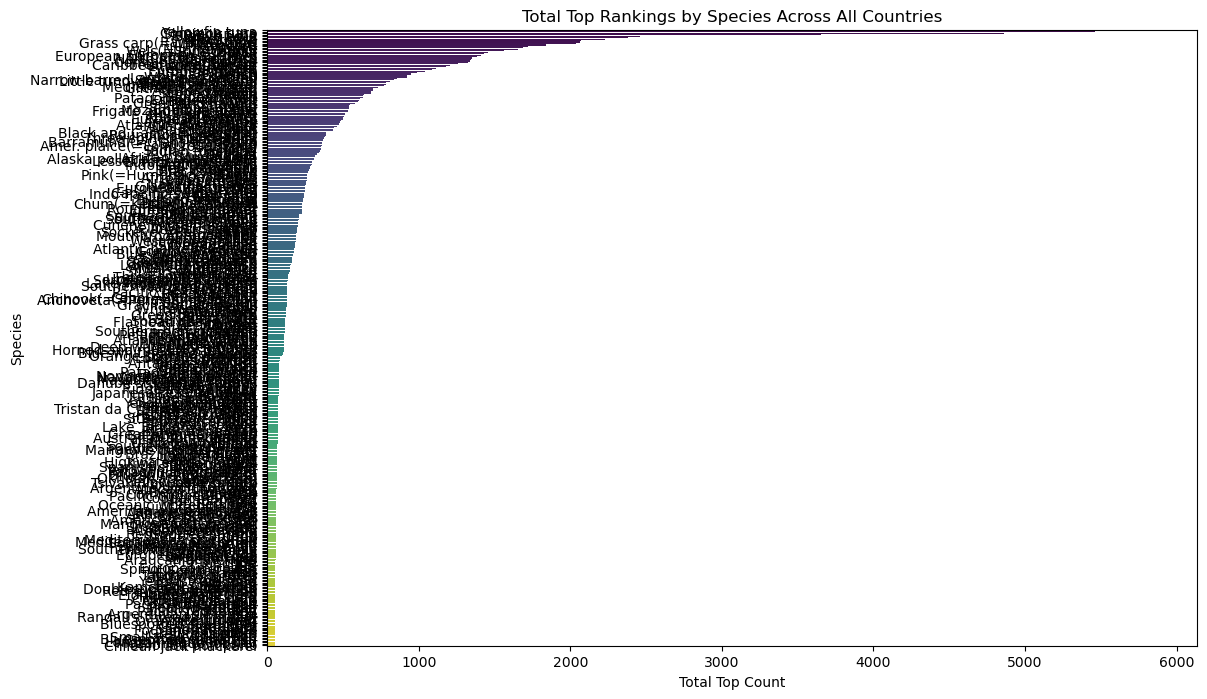

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Top_5_Count', y='Species', data=species_total, palette='viridis')

plt.title('Total Top Rankings by Species Across All Countries')
plt.xlabel('Total Top Count')
plt.ylabel('Species')
plt.show()

We will only plot the first ten entries for a more clear visualization of the most popular fish caught from 1950-2018. Interesting how tuna is one of the most caught species! (Yellowfin, Skipjack, and Bigeye)

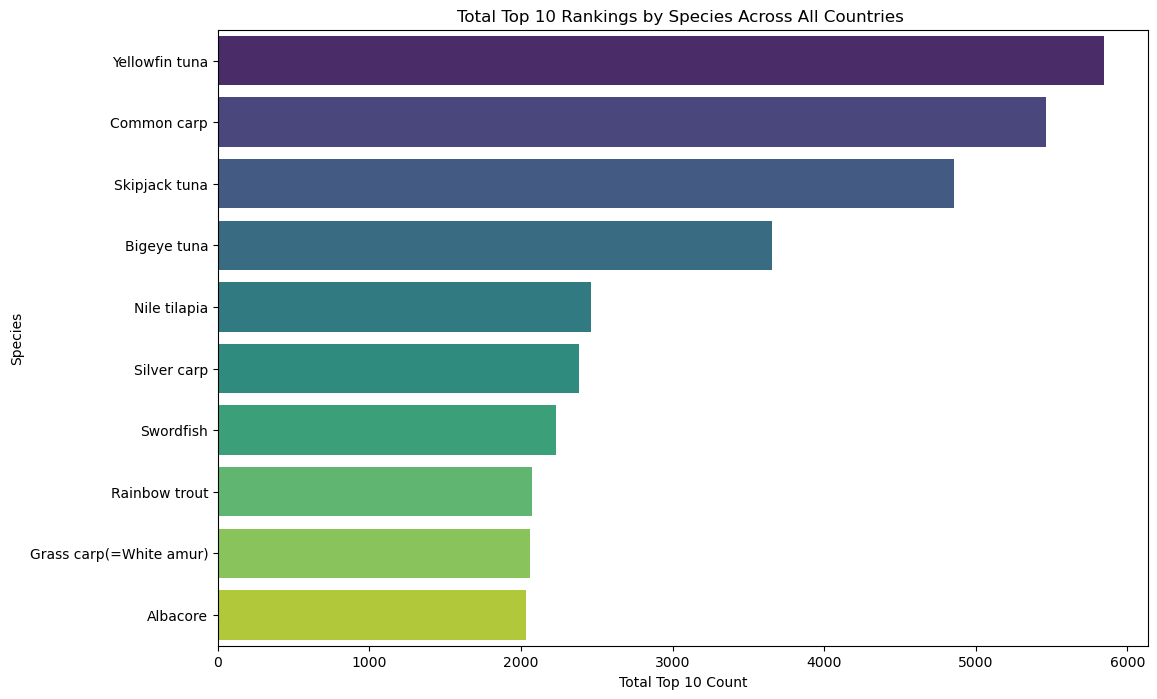

In [33]:
top_5_species_total = species_total.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Top_5_Count', y='Species', data=top_5_species_total, palette='viridis')

plt.title('Total Top 10 Rankings by Species Across All Countries ')
plt.xlabel('Total Top 10 Count')
plt.ylabel('Species')
plt.show()

### Section 2 - Species Ranked Among the Bottom

We will take our existing `df_melted` and re-rank each species where the smallest catch based on the country/year is ranked towards the top.

In [34]:
# We already created df_melted so we will reuse it by ranking those in the bottom least consistently fished species
df_melted['Rank'] = df_melted.groupby(['Country', 'Year'])['Catch'].rank(ascending=True, method='min')
df_melted

,Country,Species,Location,Year,Catch,Rank
0,Afghanistan,Rainbow trout,Asia - Inland waters,1950,0,1.0
1,Albania,Atlantic bluefin tuna,Mediterranean and Black Sea,1950,0,1.0
2,Albania,Atlantic bonito,Mediterranean and Black Sea,1950,0,1.0
3,Albania,Bighead carp,Europe - Inland waters,1950,0,1.0
4,Albania,Bleak,Europe - Inland waters,1950,0,1.0
...,...,...,...,...,...,...
1079845,Zanzibar,Spiny eucheuma,"Indian Ocean, Western",2018,102960,2.0
1079846,Zimbabwe,Dagaas,Africa - Inland waters,2018,11250,4.0
1079847,Zimbabwe,Giant river prawn,Africa - Inland waters,2018,0,1.0
1079848,Zimbabwe,North African catfish,Africa - Inland waters,2018,5,2.0


Narrowing the dataframe down so that we only get the bottom 5 least caught species.

In [35]:
# We limit the amount of ranks to those in the bottom 5
bottom_5_species = df_melted[df_melted['Rank'] <= 5]
bottom_5_species

,Country,Species,Location,Year,Catch,Rank
0,Afghanistan,Rainbow trout,Asia - Inland waters,1950,0,1.0
1,Albania,Atlantic bluefin tuna,Mediterranean and Black Sea,1950,0,1.0
2,Albania,Atlantic bonito,Mediterranean and Black Sea,1950,0,1.0
3,Albania,Bighead carp,Europe - Inland waters,1950,0,1.0
4,Albania,Bleak,Europe - Inland waters,1950,0,1.0
...,...,...,...,...,...,...
1079845,Zanzibar,Spiny eucheuma,"Indian Ocean, Western",2018,102960,2.0
1079846,Zimbabwe,Dagaas,Africa - Inland waters,2018,11250,4.0
1079847,Zimbabwe,Giant river prawn,Africa - Inland waters,2018,0,1.0
1079848,Zimbabwe,North African catfish,Africa - Inland waters,2018,5,2.0


Now will will group by the country and the species and count the amount of times a species appeared in the bottom 5.

In [36]:
# Tally up all the ranks based on the country and species 
bspecies_consistency = bottom_5_species.groupby(['Country', 'Species']).size().reset_index(name='Bottom_5_Count')
bspecies_consistency

,Country,Species,Bottom_5_Count
0,Afghanistan,Rainbow trout,69
1,Albania,Atlantic bluefin tuna,62
2,Albania,Atlantic bonito,46
3,Albania,Bighead carp,58
4,Albania,Bleak,45
...,...,...,...
10762,Zanzibar,Spiny eucheuma,69
10763,Zimbabwe,Dagaas,69
10764,Zimbabwe,Giant river prawn,69
10765,Zimbabwe,North African catfish,69


To make our data more consistent, we will have a threshold to narrow our dataframe down such that a species needs to be towards the bottom 5 at least 90% of all the years. The reason why our threshold is higher than the *Top 5* threshold is because more species are ranked in the bottom with 0 catches compared to a fish ranked the highest with an arbitarily large catch. Notice that when adding the threshold, in the Top 5, there was 1706 rows left using a 75% threshold; however, here in the bottom 5, using a 90% threshold results in 5371 rows which is still comparitively much higher considering the increased threshold.

In [37]:
# We already created total_years so we will just use that again here
# We will set a threshold to make our data more consistent for species consistently ranked in the bottom 5
# We set a 90% threshold compared to the 75% threshold since more species can be ranked last with 0 total catches
threshold = 0.9 * total_years

# Will section the dataframe to include only those in the bottom 5
bconsistent_species = bspecies_consistency[bspecies_consistency['Bottom_5_Count'] >= threshold]
bconsistent_species

,Country,Species,Bottom_5_Count
0,Afghanistan,Rainbow trout,69
6,Albania,Blue whiting(=Poutassou),64
7,Albania,Bluefish,66
10,Albania,Common carp,78
17,Albania,Crucian carp,95
...,...,...,...
10762,Zanzibar,Spiny eucheuma,69
10763,Zimbabwe,Dagaas,69
10764,Zimbabwe,Giant river prawn,69
10765,Zimbabwe,North African catfish,69


Now we will group all the species and sum the amount of times each species was in the bottom 5. This is odd. Notice that tuna (Bigeye, Yellowfin, and Skipjack) has appeared again. This means that tuna was both one of the most caught fish but also one of the least caught fish from 1950-2018. This seems contradictory but very interesting...

In [38]:
# Total all species together to get the full extent of how many species consistently ranked among the bottom
bspecies_total = bconsistent_species.groupby('Species')['Bottom_5_Count'].sum().reset_index()

# We will sort based on the greatest amount to see what species ranks among the bottom
bspecies_total = bspecies_total.sort_values(by='Bottom_5_Count', ascending=False)
bspecies_total.head()

,Species,Bottom_5_Count
137,Bigeye tuna,10998
1247,Yellowfin tuna,10729
1000,Skipjack tuna,10197
1126,Swordfish,10140
15,Albacore,9094


Here we plot the dataframe using a barchart. Again, this is a bad visualization due to the amount of species in this dataframe.

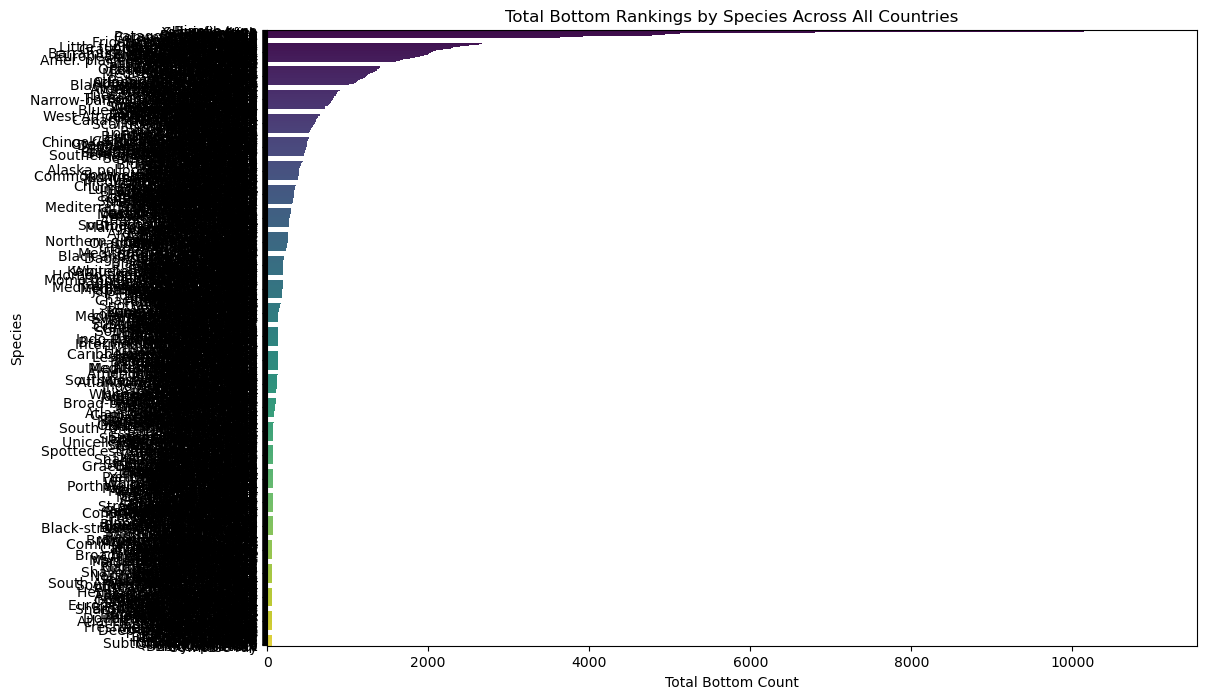

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Bottom_5_Count', y='Species', data=bspecies_total, palette='viridis')

plt.title('Total Bottom Rankings by Species Across All Countries')
plt.xlabel('Total Bottom Count')
plt.ylabel('Species')
plt.show()

Here is a much better visualization! We will only use the 10 least caught fish from 1950-2018.

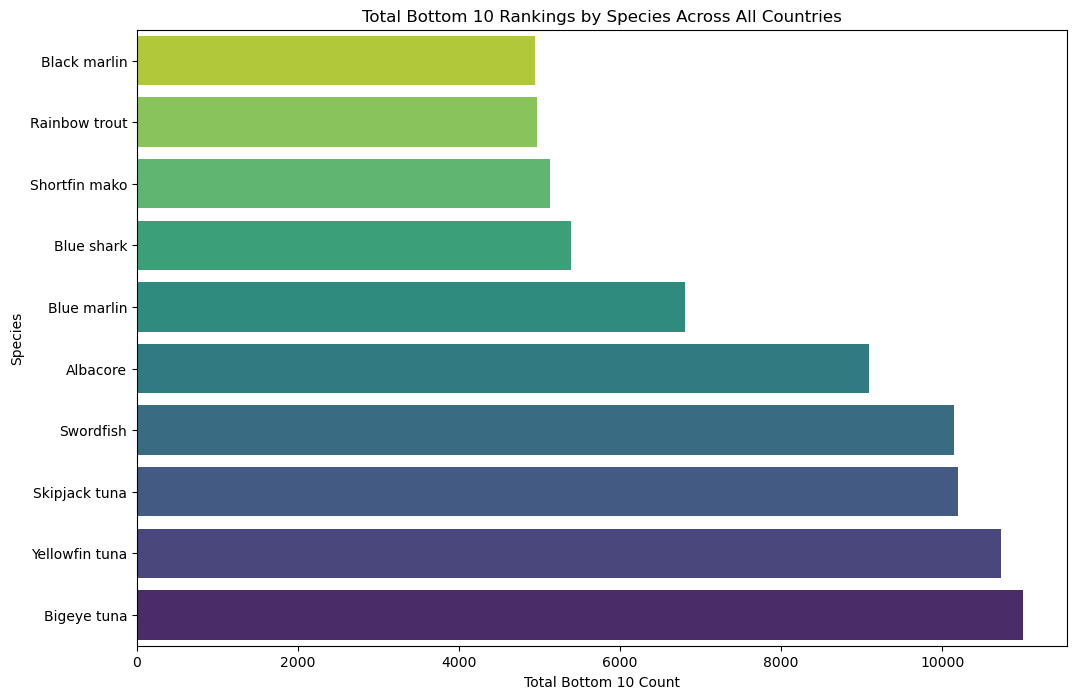

In [41]:
bottom_10_species_total = bspecies_total.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Bottom_5_Count', y='Species', data=bottom_10_species_total, palette='viridis')

plt.gca().invert_yaxis()

plt.title('Total Bottom 10 Rankings by Species Across All Countries')
plt.xlabel('Total Bottom 10 Count')
plt.ylabel('Species')
plt.show()

# Discussion and Conclusion

In my project, I hoped to determine the consistently top and bottom ranked species fished throughout the world. My dataset came from [Kaggle.com](https://www.kaggle.com/datasets/thebumpkin/worldwide-fishing-catch-statitstics-1950-2018) and included a total of 25562 observations with the features: `Country`, `Species`, `Location`, `Detail`, and the years `1950` to `2018`. From the dataset, I hypothesized that the most consistently ranked top species would be of some sort of carp, such as the Grass and Common Carp. This hypothesis was based on the fact that carp was generally cultivated in aquaculture production, which means the amount caught is significantly larger than if caught in the ocean. I also hypothesized that the most consistently ranked bottom species would be specific, less general, species such as the Goldstripe Sardinella. This hypothesis relied more-so on the provided information in this [Wikipedia.com](https://en.wikipedia.org/wiki/List_of_commercially_important_fish_species) article.

In the exploratory data analysis, we first sought to answer the top most consistently ranked species that are fished in the world; but first, we had to reformat the cleaned dataframe to be melted. Melting the dataframe made it so that each year had its own observation. By melting the dataframe, I was able to rank each catch based on the country the catch was totalled in as well as the year the catch occured in. After ranking each observation, I totalled all ranks in the top 5 by species from each country. From then, I totalled all the species from each separate country and made the dataframe consistent by adding a 75% threshold. With our resulting dataframe, I plotted a barchart and what resulted is that the Yellowfin Tuna was ranked at the top as the most consistently top ranked species fished from 1950 to 2018. Other species of tuna such as the Skipjack and the Bigeye ranked towards the top. Carp, however, ranked 2 (Common) and 6 (Nile). 

In answering the bottom most consistently ranked species, I followed a similar methodology when reformatting the dataframe but only changed the threshold to be 90%. This is because more species can have 0 tons in one year compared to species with an arbitarily large number in 1 year so I had to make the data more consistent, with similar observations, for the certain "less-popular" fish in the newly reformatted dataframe. After visualizing using a barchart, I noticed that the same species of tuna (Bigeye, Yellowfin, and Skipjack) ranked in the bottom 3. This can infer a couple points:
- The species of tuna were unpopular for a majority of the years (1950 to 2018) and exploded in popularity for the more modern years. This point is not very plausible since we added a threshold to our dataframes to ensure consistency. So if the tuna appeared in the Bottom 10 visualization, it would not have appeared in the Top 10 visualization.
- The species of tuna are unpopular for a majority of the countries in the dataset and are caught in extremely large metric tons is some countries. This is a more plausible point since we created no restriction on the certain countries that reported their catches of the specific species. 

Due to my findings, I fail to reject my hypothesis since the data showed that tuna reigned both in the Top 10 and the Bottom 10 and Carp was not as prevelent as I expected to be in the Top 10, even though the Common Carp eas at least in the top 5 most popular species. In addition, the specific species I listed in my hypothesis for the least fished species did not even appear in the visualization. In the future, I should seek to check whether certain species even appear in the dataset. Additionally, I should seek to extract more information to how these fish were caught and what countries caught tuna in large and miniscule amounts.